# 시계열 회귀

<Axes: >

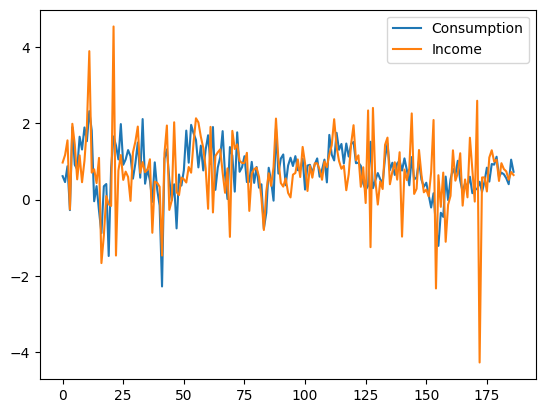

In [84]:
import pandas as pd

df = pd.read_excel('uschange.xlsx')
df.Consumption.plot(legend=True)
df.Income.plot(legend=True)

In [85]:
from statsmodels.formula.api import ols
ols('Consumption ~ Income', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     34.98
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.58e-08
Time:                        14:48:02   Log-Likelihood:                -169.62
No. Observations:                 187   AIC:                             343.2
Df Residuals:                     185   BIC:                             349.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5451      0.056      9.789      0.000       0.435       0.655
Income         0.2806      0.047      5.915      0.000       0.187       0.374
==============================================================================
Omnibus:                       16.528   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.145
Skew:                          -0.454   Prob(JB):                     4.69e-07
Kurtosis:                       4.707   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
ols('Consumption ~ Income + Production + Unemployment + Savings', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     139.5
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           2.62e-54
Time:                        14:48:45   Log-Likelihood:                -54.692
No. Observations:                 187   AIC:                             119.4
Df Residuals:                     182   BIC:                             135.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2673      0.037      7.184      0.000       0.194       0.341
Income           0.7145      0.042     16.934      0.000       0.631       0.798
Production       0.0459      0.026      1.773      0.078      -0.005       0.097
Unemployment    -0.2048      0.106     -1.941      0.054      -0.413       0.003
Savings         -0.0453      0.003    -16.287      0.000      -0.051      -0.040
==============================================================================
Omnibus:                       18.566   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.796
Skew:                           0.564   Prob(JB):                     5.58e-07
Kurtosis:                       4.556   Cond. No.                         61.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 추세

In [94]:
n = len(df)
n

187

In [91]:
df['t'] = np.arange(n)

In [93]:
ols('Consumption ~ t', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4.726
Date:                Thu, 08 Aug 2024   Prob (F-statistic):             0.0310
Time:                        15:03:24   Log-Likelihood:                -183.46
No. Observations:                 187   AIC:                             370.9
Df Residuals:                     185   BIC:                             377.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9242      0.095      9.777      0.000       0.738       1.111
t             -0.0019      0.001     -2.174      0.031      -0.004      -0.000
==============================================================================
Omnibus:                       46.181   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.917
Skew:                          -1.058   Prob(JB):                     6.74e-26
Kurtosis:                       6.225   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 계절성

In [109]:
year  = n // 4 # 몫
df['season'] = np.tile([1,2,3,4], year + 1)[:n]
ols('Consumption ~ C(season)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5513
Date:                Thu, 08 Aug 2024   Prob (F-statistic):              0.648
Time:                        15:11:51   Log-Likelihood:                -184.97
No. Observations:                 187   AIC:                             377.9
Df Residuals:                     183   BIC:                             390.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7356      0.096      7.667      0.000       0.546       0.925
C(season)[T.2]    -0.0296      0.136     -0.218      0.828      -0.297       0.238
C(season)[T.3]     0.1143      0.136      0.842      0.401      -0.153       0.382
C(season)[T.4]    -0.0424      0.136     -0.311      0.756      -0.312       0.227
==============================================================================
Omnibus:                       29.475   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.812
Skew:                          -0.718   Prob(JB):                     1.39e-14
Kurtosis:                       5.476   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p가 모두 0.05보다 크기 때문에 계절성이 없다는 것을 기각할 수 없다

계절성이 있을 수는 있지만 없을 가능성을 배제 못함